# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from __future__ import division
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [7]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.3+ MB


In [8]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [9]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

c:\python27\lib\site-packages\pandas\core\indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


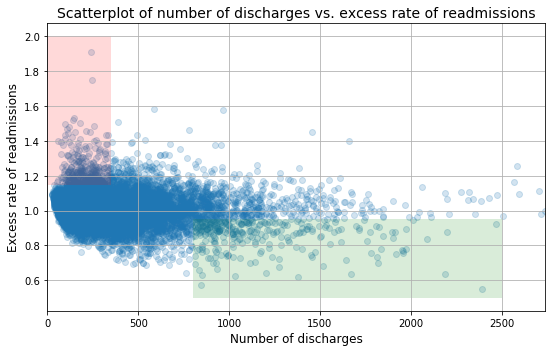

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function

x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   <font color="green"> The above analysis is partially correct.<br> The initial observations based on the plot are correct. However the plot can be further broken down by the Measure Name. The Measure name identifies the type of treatment provided. Based on the charts below the Hip- Knee replacement procedure has high admission rates where capacity is low. All other procedures have almost equal re-admission incidence for different levels of capacity/discharge.</font> 
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
       <br><font color="green"> To test the re-admission rate for hospitals having capacity of less than 100 and greater than 1000, we can do two tests
       1) Two sample T-Test for means. This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. The first sample is for hospitals having capacity less than 100 and the second sample for hospitals greater than 1000 <br>
       2) Test of corelation between capacity and re-admission rate<br></font>
       
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [11]:
# Two sample T-Test for means. 
# This is a two-sided test for the null hypothesis that 2 independent samples have
# identical average (expected) values. 
# The first sample is for hospitals having capacity less than 100 and 
# the second sample for hospitals greater than 1000
# The Null Hypothesis is that the means between the two samples are the same
filter_1 = clean_hospital_read_df["Number of Discharges"] < 100
filter_2 = clean_hospital_read_df["Number of Discharges"] > 1000
readmission_less_100_df = clean_hospital_read_df[filter_1]["Excess Readmission Ratio"]
readmission_gt_1000_df = clean_hospital_read_df[filter_2]["Excess Readmission Ratio"]

t_statistic, p_value = stats.ttest_ind(readmission_less_100_df,readmission_gt_1000_df)

print "p_value=", p_value
print "t_statistic=", t_statistic

p_value= nan
t_statistic= nan


<h3>Observation</h3>
<font color="green"> The P Value is very small and hence the Null Hypothesis can be rejected. There is a difference in means between the admission rates of hospitals with capacity less than a 100 and capacity greater than 100</font>

In [12]:
# Find corelation between discharges/capacity vs admission p value
capacity = clean_hospital_read_df["Number of Discharges"]
readmission = clean_hospital_read_df["Excess Readmission Ratio"]
coeff,p_value = stats.pearsonr(capacity,readmission)
print "Pearson Coefficient: ", coeff
print "2 Tail P Values: ", p_value

Pearson Coefficient:  nan
2 Tail P Values:  1.0


<h3> Observation</h3>
<font color="green"> There is a negative correlation ( though very small) between Hospital capacity and redamission ratio. <br>
The P value is very small and hence the Null Hypothesis (there is no relation between the two variables) can be rejected. Further down we do a corelation between the two variables based on the procedure (Knee replacement vs Heart Failure vs Heart attack).
</font>

In [13]:
#validate the mean admission rate as found in the exploratory analysis.
clean_hospital_read_df=clean_hospital_read_df[81:-3]
filter_1 = clean_hospital_read_df["Number of Discharges"] < 100
filter_2 = clean_hospital_read_df["Excess Readmission Ratio"] > 1
filter_3 = filter_1 & filter_2
count=clean_hospital_read_df[filter_1].shape[0]
mean_readmission_less_100=clean_hospital_read_df[filter_1]["Excess Readmission Ratio"].mean()
percent_readmission_less_100=(clean_hospital_read_df[filter_3]["Excess Readmission Ratio"].shape[0] \
                             / count)*100

print "Mean Admission rate for Discharges less than 100:",mean_readmission_less_100
print "Percent Admission rate for Discharges less than 100:",percent_readmission_less_100

filter_1 = clean_hospital_read_df["Number of Discharges"] > 1000
filter_3 = filter_1 & filter_2
count=clean_hospital_read_df[filter_1].shape[0]
mean_readmission_greater_1000=clean_hospital_read_df[filter_1]["Excess Readmission Ratio"].mean()
percent_readmission_greater_1000=(clean_hospital_read_df[filter_3]["Excess Readmission Ratio"].shape[0] \
                             / count)*100

print "Mean Admission rate for Discharges greater than 100:",mean_readmission_greater_1000
print "Percent Admission rate for Discharges greater than 100:",percent_readmission_greater_1000

Mean Admission rate for Discharges less than 100: 1.02261835017
Percent Admission rate for Discharges less than 100: 63.2154882155
Mean Admission rate for Discharges greater than 100: 0.979073043478
Percent Admission rate for Discharges greater than 100: 44.5652173913


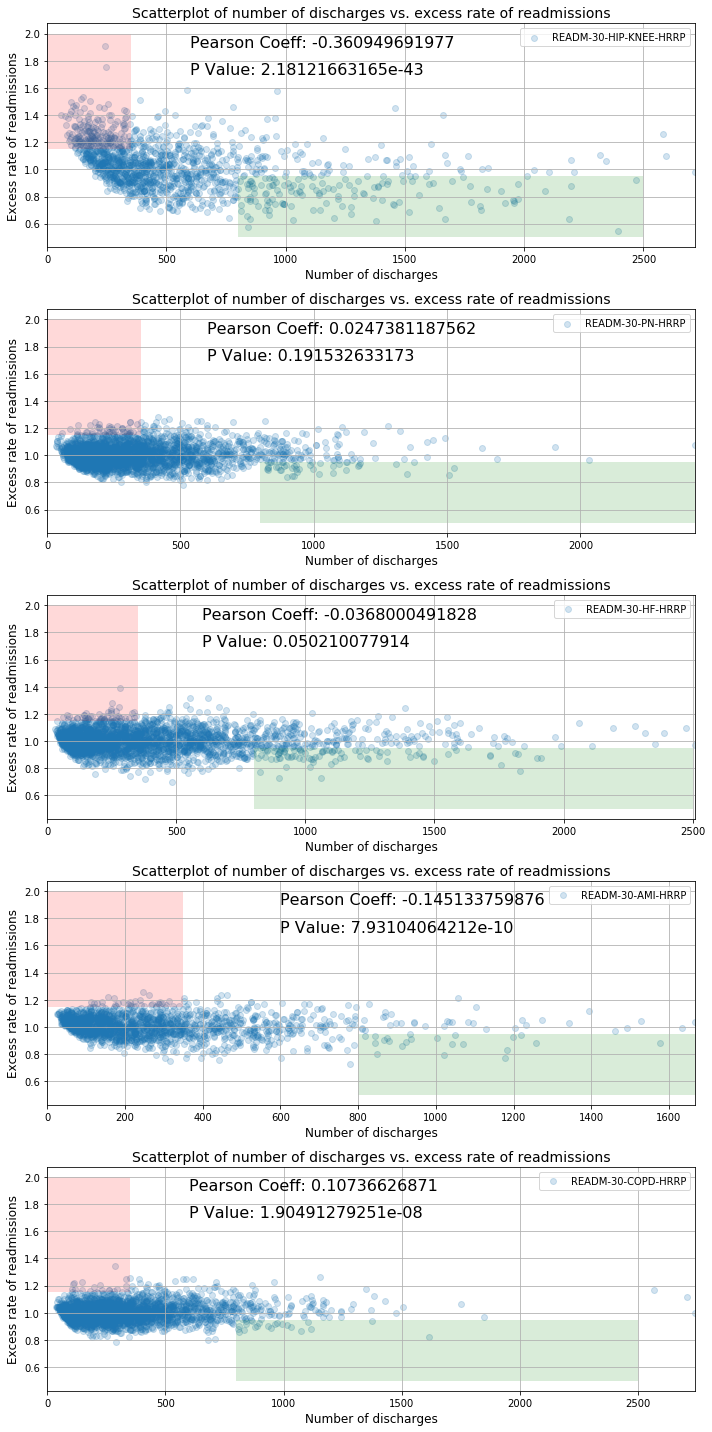

In [38]:
measures=set(clean_hospital_read_df["Measure Name"])
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
fig, ax = plt.subplots(nrows=5,figsize=(10,20))
row=0
for measure in measures:
    filter= clean_hospital_read_df["Measure Name"] == measure
    x = [a for a in clean_hospital_read_df[filter]['Number of Discharges']]
    y = list(clean_hospital_read_df[filter]['Excess Readmission Ratio'])
    coeff,p_value = stats.pearsonr(x,y)
    
    ax[row].scatter(x, y,alpha=0.2)

    ax[row].fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
    ax[row].fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

    ax[row].set_xlim([0, max(x)])
    ax[row].text(600,1.9,"Pearson Coeff: " + str(coeff),fontdict={'size': 16})
    ax[row].text(600,1.7,"P Value: " + str(p_value),fontdict={'size': 16})
    ax[row].set_xlabel('Number of discharges', fontsize=12)
    ax[row].set_ylabel('Excess rate of readmissions', fontsize=12)
    ax[row].set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
    ax[row].grid(True)
    ax[row].legend([measure],loc="upper right")
    row +=1

    
fig.tight_layout()

<h3>Observation</h3>
<font color="green">There is a high co-relation (-0.36) at a low p-value between capaciy and re-admission ratios for Knee replacement compared to others.
There is no co-relation (p value higher $\alpha$ = .01) for procedure involving Heart failure and Pneuomnia </font>

<h3>Alternate way to plot discharges vs admission rate.</h3>

In [48]:
# output to notebook
bkp.output_notebook()

colormap = {'READM-30-AMI-HRRP': 'red', \
            'READM-30-COPD-HRRP': 'green', \
            'READM-30-HF-HRRP': 'blue', \
            'READM-30-HIP-KNEE-HRRP': "black" ,\
            'READM-30-PN-HRRP': "yellow"
           }
clean_hospital_read_df['color'] = clean_hospital_read_df['Measure Name'].map(lambda x: colormap[x])

x = [a for a in clean_hospital_read_df['Number of Discharges']]
y = list(clean_hospital_read_df['Excess Readmission Ratio'])
y = list(clean_hospital_read_df['Excess Readmission Ratio'])
s= list(clean_hospital_read_df['State'])
p = bkp.figure(plot_width=750, plot_height=400)
p.scatter(x, y,  color=z,   fill_alpha=1)
# show the results
bkp.show(p)

Loading BokehJS ...